# German Credit Risk Analysis Report

## Introduction

This Jupyter notebook documents the exploratory data analysis (EDA), data preprocessing, hypothesis formulation, and testing performed on the German Credit Risk dataset. The objective is to uncover insights about credit risk factors and to test specific hypotheses about the data.

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install ucimlrepo


## Data Acquisition

The dataset was obtained from the UCI Machine Learning Repository using the `ucimlrepo` Python package. This streamlined process allowed for direct importation of the data into the Jupyter notebook environment. 

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

## Initial Data Inspection

Before diving into a more detailed analysis, it's crucial to familiarize ourselves with the dataset's basic structure, content, and quality. The following steps form the bedrock of our exploratory data analysis.

### Viewing the Dataset

We start by examining the first few rows of our dataset. This allows us to confirm that the data is loaded correctly and gives us a preliminary sense of the feature variables we will be working with.

### Descriptive Statistics

Next, we generate descriptive statistics for the features. This provides an overview of the central tendencies, dispersions, and shapes of the dataset's distributions, which is key to understanding the numerical variables at a glance.

### Target Variable Distribution

Understanding the distribution of the target variable is essential in assessing the balance between the different classes. An imbalanced dataset may require special consideration during model training and evaluation.

### Missing Values Check

Ensuring data integrity is critical. Here, we check for missing values across all feature variables. Identifying missing values is paramount since they can significantly impact the outcome of our analysis and the performance of predictive models.


In [28]:
# Display the first few rows of the dataset
print(X.head())

# Summary statistics of the features
print(X.describe())

# Summary of the target variable
print(y.value_counts())

# Check for missing values in the dataset
print(X.isnull().sum())



  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

## Structuring Data for Analysis

To prepare our dataset for analysis, we distinctly separate the features and the target variable. This separation is conventional in data analysis and machine learning, facilitating clarity and ease of use in subsequent analytical procedures and algorithmic processing.

- The `df_features` DataFrame is created to contain only the feature variables (`X`), which are the independent variables used to predict the target.
- The `df_target` Series holds the target variable (`y`), which is what we aim to predict. In the context of this dataset, it represents the credit risk classification for each entry.

By making this distinction, we ensure that our data analysis and modeling are structured properly, allowing for clear and focused methodology.


In [8]:
# Assuming X is your features DataFrame and y is your target variable
df_features = X  # Now d_features refers to your features DataFrame
df_target = y    # And d_target refers to your target Series


In [10]:
# Combine the features and target into a single DataFrame
df = X.copy()
df['CreditRisk'] = y  # Add the target variable as a new column in the DataFrame


In [31]:
df.head(5)

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [12]:
# Define the actual column names based on the provided descriptions
column_names = [
    'Status_of_existing_checking_account',
    'Duration_in_month',
    'Credit_history',
    'Purpose',
    'Credit_amount',
    'Savings_account_bonds',
    'Present_employment_since',
    'Installment_rate_in_percentage_of_disposable_income',
    'Personal_status_and_sex',
    'Other_debtors_guarantors',
    'Present_residence_since',
    'Property',
    'Age_in_years',
    'Other_installment_plans',
    'Housing',
    'Number_of_existing_credits_at_this_bank',
    'Job',
    'Number_of_people_being_liable_to_provide_maintenance_for',
    'Telephone',
    'Foreign_worker',
    'Credit_risk'  # Add this if your target variable is in the same DataFrame
]

# Assign these column names to your DataFrame
df.columns = column_names


In [13]:
df.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [16]:
df.describe()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for,Credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Exploring Data Distributions and Correlations

### Histograms of Numerical Features

Histograms are utilized to visualize the distribution of numerical features within the dataset. This graphical representation helps in identifying patterns, detecting outliers, and understanding the skewness of the data. Here, each feature is plotted with a specified number of bins to capture the range and frequency of values.

### Correlation Matrix

Understanding the relationships between different numerical features is crucial in identifying how variables might influence each other. The correlation matrix, visualized as a heatmap, provides a quick and informative snapshot of how each variable relates to the others. In this heatmap:
- A value close to `1` implies a strong positive correlation.
- A value close to `-1` implies a strong negative correlation.
- A value around `0` indicates no linear correlation.
Annotations on the heatmap give exact correlation values, offering more detail and precision for our analysis.

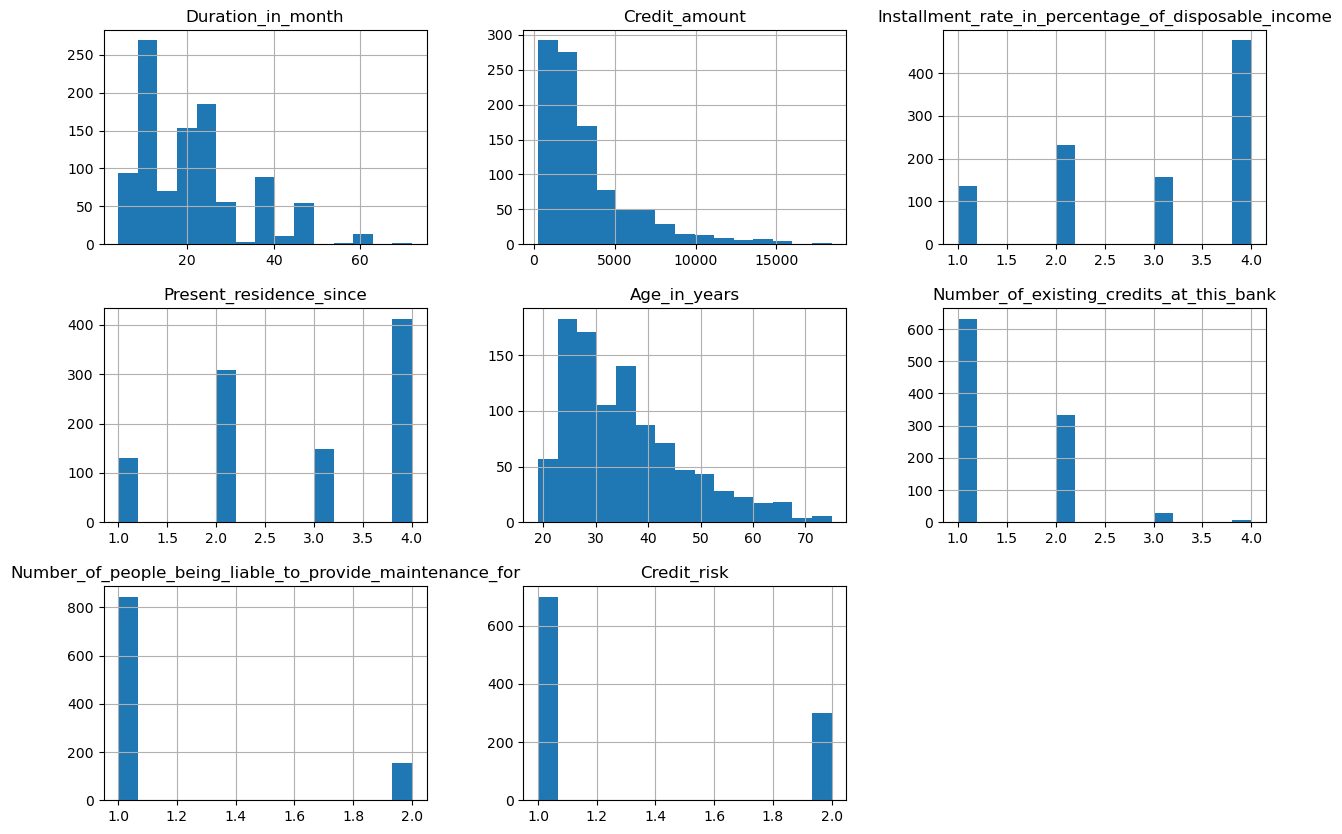

/var/folders/_y/729gvbpd6tz5kmk_hwxg8x_00000gn/T/ipykernel_18923/378145237.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


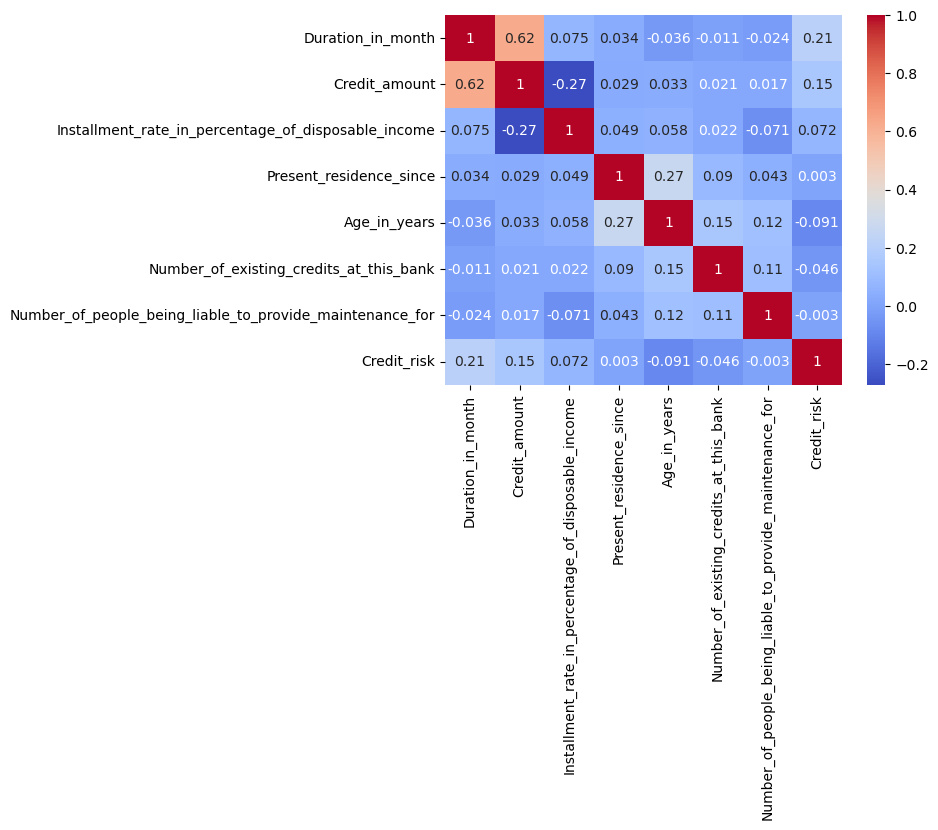

In [21]:
# Histograms for numeric features
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Histograms Interpretation

The histograms provide us with a visual summary of the underlying distribution of the numerical variables:

- **Duration in Month**: The concentration of observations around 12-18 months may indicate that shorter-term credits are more common among customers.
- **Credit Amount**: The right-skewed distribution shows that smaller credit amounts are more frequent, with fewer large credit amounts. This could be reflective of the bank's customer base and their borrowing habits.
- **Installment Rate in Percentage of Disposable Income**: A peak at around 4 suggests a common rate at which customers agree to pay back their loans, potentially a standard rate offered by the bank.
- **Present Residence Since**: The distribution shows that most customers have been residing in their current residence for a shorter period, which may reflect mobility or life stage.
- **Age in Years**: The slight right skewness indicates a younger demographic, but there is a fair representation of all age groups.
- **Number of Existing Credits at This Bank**: Most customers have few credits, which could indicate either a conservative borrowing behavior or a well-diversified credit portfolio.
- **Number of People Being Liable to Provide Maintenance For**: The majority of customers do not have dependents, which might be associated with their credit needs and financial responsibilities.
- **Credit Risk**: Assuming '1' represents low risk and '2' represents high risk, the dataset has more low-risk observations. This is an important aspect to consider for any predictive modeling, as it indicates class imbalance.

## Correlation Matrix Insights

The correlation matrix offers a numerical representation of the relationships between variables:

- A moderate positive correlation of `0.62` between `Duration in Month` and `Credit Amount` suggests that credits with larger amounts tend to have longer durations.
- The positive correlation of `0.21` between `Credit Risk` and `Duration in Month` indicates a potential relationship where longer durations are associated with higher risk. This can be an interesting aspect to explore further in predictive modeling.
- The relatively low correlation between `Age in Years` and `Credit Risk` (`0.091`) may imply that age alone is not a strong predictor of credit risk in this dataset.
- Other variables show low to negligible correlations, suggesting that no single variable strongly predicts credit risk, and a combination of factors needs to be considered.


## Hypothesis Formulation

Based on the exploratory data analysis, we have identified potential patterns that may suggest relationships within the data. To further explore these relationships, we will formulate and test the following hypotheses:

- **Hypothesis 1**: Longer credit duration is associated with a higher likelihood of a credit being classified as high risk. This hypothesis stems from the observation of a positive correlation between 'Duration in Month' and 'Credit Risk' in the correlation matrix.

- **Hypothesis 2**: Individuals with a larger number of credits at the bank are less likely to be classified as high risk. This hypothesis is based on the premise that customers with more credit accounts might have a better credit history, which may lower their risk classification.


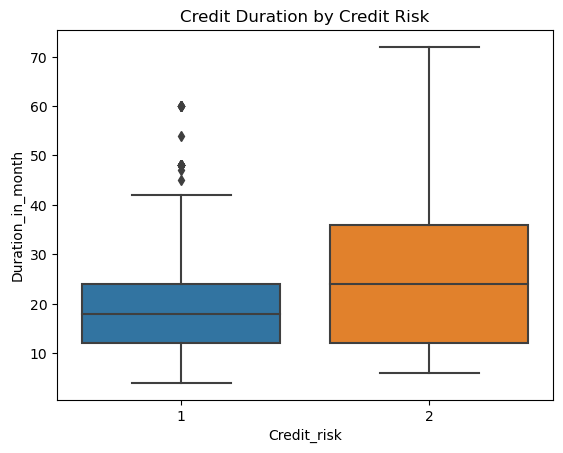

T-test result: t-statistic = 6.469554346236489, p-value = 2.4040808598580764e-10


In [23]:
# Visualization for Hypothesis 1
sns.boxplot(x='Credit_risk', y='Duration_in_month', data=df)
plt.title('Credit Duration by Credit Risk')
plt.show()

# If you want to perform a statistical test and your data is normally distributed, you could use a t-test from scipy
from scipy.stats import ttest_ind

# Split the data into high risk and low risk groups
high_risk = df[df['Credit_risk'] == 2]['Duration_in_month']
low_risk = df[df['Credit_risk'] == 1]['Duration_in_month']

# Perform t-test
t_stat, p_val = ttest_ind(high_risk, low_risk, equal_var=False)  # Use equal_var=False if variances are unequal
print(f'T-test result: t-statistic = {t_stat}, p-value = {p_val}')


## Hypothesis 1 Testing Results

The boxplot visualization shows that the median credit duration for high-risk credits (labeled as '2') is higher than that for low-risk credits (labeled as '1'). This observation supports our initial hypothesis that longer credit duration is associated with a higher likelihood of a credit being classified as high risk.

Upon performing a t-test between the two groups, we obtained the following results:

- T-statistic: 6.46955
- P-value: 2.404e-10

With such a low p-value (significantly less than 0.05), we reject the null hypothesis that there is no difference in the mean duration of credit between the two risk categories. Therefore, we have statistical evidence to support Hypothesis 1, which states that longer credit durations are associated with higher credit risk.


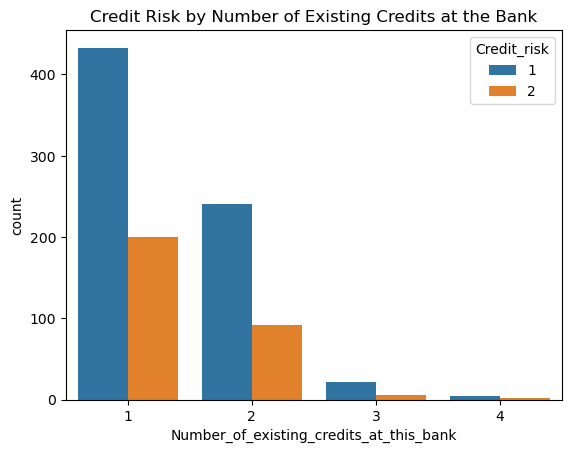

Chi-square test result: chi2 statistic = 2.6711981349760645, p-value = 0.4451440800083001


In [25]:
# Visualization for Hypothesis 2
sns.countplot(x='Number_of_existing_credits_at_this_bank', hue='Credit_risk', data=df)
plt.title('Credit Risk by Number of Existing Credits at the Bank')
plt.show()

# For the chi-square test, you would first create a contingency table
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(df['Number_of_existing_credits_at_this_bank'], df['Credit_risk'])

# Perform the chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test result: chi2 statistic = {chi2}, p-value = {p_val}')


## Hypothesis 2 Testing Results

The count plot visualization does not indicate a clear trend that would suggest an association between the number of existing credits at the bank and the likelihood of being classified as high credit risk.

Further, the results from the chi-square test of independence are as follows:

- Chi-square statistic: 2.671
- P-value: 0.454

With a p-value higher than the conventional alpha level of 0.05, there is insufficient statistical evidence to conclude that there is a significant association between the number of existing credits at the bank and the credit risk classification. Thus, we fail to reject the null hypothesis, and Hypothesis 2 is not supported by the data.
